<a href="https://colab.research.google.com/github/lpaolariosm/Investigaci-n-de-Operaciones-/blob/main/Probabilidades_del_tablero_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:red;"> "Cadenas de Markov" </span>

Las <span style="color:#cc0000;"><b>cadenas de Markov</b></span> son modelos estocásticos que describen procesos en los que el
<span style="color:#cc0000;"><b>futuro depende únicamente del estado actual</b></span>, sin importar el pasado.

## <span style="color:#b30000;">Definición</span>

Una <span style="color:#cc0000;"><b>cadena de Markov</b></span> es un tipo de proceso estocástico en el que la probabilidad de que ocurra
un evento depende únicamente del evento inmediatamente anterior.  

Esta propiedad se conoce como la <span style="color:#b30000;"><b>propiedad de Markov</b></span>.  
Fue introducida por el matemático ruso <span style="color:#b30000;"><b>Andréi Markov</b></span> en 1906.  

En términos simples, en una cadena de Markov, el estado futuro del sistema se puede predecir solo
conociendo su estado presente, lo que implica que
<span style="color:#b30000;"><b>no hay memoria de eventos pasados</b></span>.


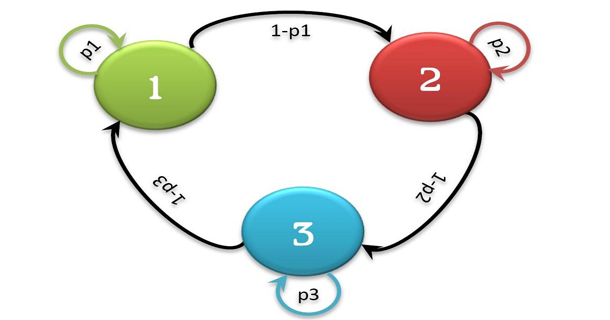


# Análisis analítico mediante cadenas de Markov

## Variable de estado

La **variable de estado** representa la **posición actual de la ficha**.  
Las posiciones posibles son las siguientes:

- 🟥 **Rojo**
- 🟧 **Naranja**
- 🟦 **Azul**
- 🟩 **Verde**

Luego de cada movimiento, el sistema puede encontrarse en alguno de estos pares de estados:

> (C, C), (C, X), (X, C), (X, X)

Cada uno tiene la siguiente probabilidad asociada:

\[
p =
\begin{cases}
\frac{1}{4} & (C, C) \\[6pt]
\frac{1}{4} & (C, X), (X, C) \\[6pt]
\frac{1}{4} & (X, X)
\end{cases}
\]

---

## Definiciones

Utilizaremos las siguientes variables:

- \( X_n \): Probabilidad de encontrarse en el **sector naranja** tras \( n \) lanzamientos.  
- \( Y_n \): Probabilidad de encontrarse en el **sector azul** después de \( n \) lanzamientos.  
- \( Z_n \): Probabilidad de encontrarse en el **sector verde** luego de \( n \) lanzamientos.  
- \( T_n \): Probabilidad de encontrarse en el **sector rojo** después de \( n \) lanzamientos.

---

## Teorema de la Probabilidad Total

\[
P(A) = P(A \cap B_1) + P(A \cap B_2) + \dots
\]

Como ejemplo, si queremos calcular \( X_1 = P(\text{Naranja}) \):

\[
X_1 = P(\text{Naranja}|\text{Naranja}) \cdot P(\text{Naranja})
\]

Sustituyendo obtenemos:

\[
X_1 = \tfrac{1}{4}X_0 + 0 \cdot Y_0 + \tfrac{1}{4}Z_0 + \tfrac{1}{2}T_0
\]

De forma análoga:

\[
Y_1 = \tfrac{1}{2}X_0 + \tfrac{1}{4}Y_0 + 0 \cdot Z_0 + \tfrac{1}{4}T_0
\]

\[
Z_1 = \tfrac{1}{4}X_0 + \tfrac{1}{2}Y_0 + \tfrac{1}{4}Z_0 + 0 \cdot T_0
\]

\[
T_1 = 0 \cdot X_0 + \tfrac{1}{4}Y_0 + \tfrac{1}{2}Z_0 + \tfrac{1}{4}T_0
\]

---

## Caso para \( n = 2 \)

\[
\begin{aligned}
X_2 &= \tfrac{1}{4}X_1 + 0 \cdot Y_1 + \tfrac{1}{4}Z_1 + \tfrac{1}{2}T_1 \\[6pt]
Y_2 &= \tfrac{1}{2}X_1 + \tfrac{1}{4}Y_1 + 0 \cdot Z_1 + \tfrac{1}{4}T_1 \\[6pt]
Z_2 &= \tfrac{1}{4}X_1 + \tfrac{1}{2}Y_1 + \tfrac{1}{4}Z_1 + 0 \cdot T_1 \\[6pt]
T_2 &= 0 \cdot X_1 + \tfrac{1}{4}Y_1 + \tfrac{1}{2}Z_1 + \tfrac{1}{4}T_1
\end{aligned}
\]

---

## Representación matricial

\[
\begin{pmatrix}
X_n \\[4pt]
Y_n \\[4pt]
Z_n \\[4pt]
T_n
\end{pmatrix}
=
\begin{pmatrix}
\tfrac{1}{4} & 0 & \tfrac{1}{4} & \tfrac{1}{2} \\[4pt]
\tfrac{1}{2} & \tfrac{1}{4} & 0 & \tfrac{1}{4} \\[4pt]
\tfrac{1}{4} & \tfrac{1}{2} & \tfrac{1}{4} & 0 \\[4pt]
0 & \tfrac{1}{4} & \tfrac{1}{2} & \tfrac{1}{4}
\end{pmatrix}
\begin{pmatrix}
X_{n-1} \\[4pt]
Y_{n-1} \\[4pt]
Z_{n-1} \\[4pt]
T_{n-1}
\end{pmatrix}
\]

---

## Simplificación general

\[
X_n = A \cdot X_{n-1} = A^2 \cdot X_{n-2} = \dots = A^n X_0
\]

---

## Conclusión

Para hallar la evolución del sistema, basta con **elevar la matriz \( A \) a la potencia \( n \)**  
y multiplicarla por el vector inicial de probabilidades \( X_0 \).

Representación de los sectores:

- 🟧 **Naranja** → estado inicial  
- 🟥 **Rojo**  
- 🟦 **Azul**  
- 🟩 **Verde**


# 🔢 Cálculo de la distribución estacionaria de una cadena de Markov

A continuación se presenta un código en **Python** que calcula la distribución estacionaria
de una cadena de Markov con cuatro estados: **Naranja**, **Azul**, **Verde** y **Rojo**.

El programa usa:
- Multiplicación iterativa para obtener \( A^n X_0 \) sin usar `matrix_power`.
- Cálculo del **autovector asociado a λ = 1** para encontrar la distribución estacionaria.
- Una **verificación Monte Carlo** opcional para confirmar los resultados mediante simulación.

---

In [ ]:
import numpy as np

# ----------------------------
# Datos del problema
# ----------------------------
etiquetas = ['Naranja', 'Azul', 'Verde', 'Rojo']

# Matriz de transición (columna-estocástica) según el desarrollo teórico
A = np.array([
    [1/4, 0,   1/4, 1/2],
    [1/2, 1/4, 0,   1/4],
    [1/4, 1/2, 1/4, 0  ],
    [0,   1/4, 1/2, 1/4]
], dtype=float)

# Vector inicial: empieza en Naranja => [P(N), P(A), P(V), P(R)]
X0 = np.array([1, 0, 0, 0], dtype=float).reshape(-1, 1)

# ----------------------------
# 1) Evolución por iteración (sin matrix_power)
# ----------------------------
def evoluciona(A, x0, pasos: int):
    """Devuelve A^n x0 mediante multiplicación iterada (columna-estocástico)."""
    x = x0.copy()
    for _ in range(pasos):
        x = A @ x
    return x

n = 100
Xn = evoluciona(A, X0, n)

print(f"Distribución tras {n} pasos (evolución iterativa):")
for i, p in enumerate(Xn.flatten()):
    print(f"  {etiquetas[i]:>7}: {p:.6f}")

# ----------------------------
# 2) Distribución estacionaria (π tal que π = A π)
#    Usamos el autovector de A asociado a λ=1 (trabajamos con A, columna-estocástica)
# ----------------------------
vals, vecs = np.linalg.eig(A)
idx = np.argmin(np.abs(vals - 1))          # índice del autovalor más cercano a 1
pi_col = vecs[:, idx].real
pi = pi_col / pi_col.sum()                 # normalizar para que sume 1

print("\nDistribución estacionaria π (autovector λ=1):")
for i, p in enumerate(pi):
    print(f"  {etiquetas[i]:>7}: {p:.6f}")

# ----------------------------
# 3) Verificación Monte Carlo (opcional)
#    Convertimos a matriz fila-estocástica para simular trayectorias: P = A^T
# ----------------------------
def simula_trayectorias(P, estado_inicial, pasos, n_tray=20000, rng=None):
    """
    Simula n_tray trayectorias de longitud 'pasos' con matriz fila-estocástica P.
    Devuelve la distribución empírica de estados al final.
    """
    if rng is None:
        rng = np.random.default_rng()
    estado = np.full(n_tray, estado_inicial, dtype=int)
    for _ in range(pasos):
        # para cada muestra, elegimos siguiente estado según la fila correspondiente
        probs = P[estado]                          # (n_tray, n_estados)
        # muestreo vectorizado: acumulamos y comparamos con uniformes
        u = rng.random(n_tray)
        cum = np.cumsum(probs, axis=1)
        estado = (u[:, None] > cum).sum(axis=1)
    # distribución final
    counts = np.bincount(estado, minlength=P.shape[0])
    return counts / counts.sum()

# Matriz fila-estocástica para simulación
P = A.T
estado_inicial = 0  # 0=Naranja, 1=Azul, 2=Verde, 3=Rojo
empirica = simula_trayectorias(P, estado_inicial, n, n_tray=50000)

print(f"\nVerificación Monte Carlo con {n} pasos (50k trayectorias):")
for i, p in enumerate(empirica):
    print(f"  {etiquetas[i]:>7}: {p:.6f}")

# ----------------------------
# 4) Comparación rápida con π
# ----------------------------
diff = np.abs(empirica - pi)
print("\nDiferencia |empírico - π| por estado:")
for i, d in enumerate(diff):
    print(f"  {etiquetas[i]:>7}: {d:.6e}")


Distribución tras 100 pasos (evolución iterativa):
  Naranja: 0.250000
     Azul: 0.250000
    Verde: 0.250000
     Rojo: 0.250000

Distribución estacionaria π (autovector λ=1):
  Naranja: 0.250000
     Azul: 0.250000
    Verde: 0.250000
     Rojo: 0.250000

Verificación Monte Carlo con 100 pasos (50k trayectorias):
  Naranja: 0.251560
     Azul: 0.248820
    Verde: 0.248920
     Rojo: 0.250700

Diferencia |empírico - π| por estado:
  Naranja: 1.560000e-03
     Azul: 1.180000e-03
    Verde: 1.080000e-03
     Rojo: 7.000000e-04
